In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
data=pd.read_csv('F:\Divya\data set\googleplaystore.csv')
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Removing last 3 columns as they are not so much useful in analysis 

In [6]:
data=data.drop(['Last Updated','Current Ver','Android Ver'],axis=1)
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


### Rating 

Removing the row where the rating is higher than 5 

In [8]:
data.drop(data[data.Rating>5].index,inplace=True)
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


 ### Size 
 
Removing m and k and replacing 'varies with value' to NAN                   
Converting Size which is in string to numeric 

In [9]:
data['Size']=data['Size'].map(lambda x:x.rstrip('M'))

In [10]:
data['Size']=data['Size'].map(lambda x:round((float(x.rstrip('k')))/1024) if x[-1]=='k' else x )

In [11]:
data['Size']=data['Size'].map(lambda x:np.nan if x=='Varies with device' else x )

In [12]:
data['Size']=pd.to_numeric(data.Size)
data['Size'].dtypes
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity


### Reviews 
Converted string to numeric

In [13]:
data['Reviews']=pd.to_numeric(data.Reviews)

### Installs 
Removing +           
Converted from string to numeric 

In [14]:
data['Installs'] = data.Installs.map(lambda x:x.rstrip('+'))

In [15]:
data['Installs']=data['Installs'].str.replace(",","")

In [16]:
data['Installs'] = pd.to_numeric(data.Installs)

### Price 

Converted the column to numeric            
As the price was in dollar converted to rupee

In [17]:
data['Price']=data['Price'].str.replace("$","")

In [18]:
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [20]:
data['Price']=pd.to_numeric(data.Price,errors='coerce')

In [21]:
data['Price']=data['Price'].map(lambda x: x*73 if x!=0 else x)
data.Price.unique()

array([    0.  ,   364.27,   291.27,   510.27,   108.77,   218.27,
         583.27,   437.27,   254.77,   145.27,   729.27,   546.77,
          72.27,   657.  ,   400.77,   730.  ,  1824.27,   875.27,
        5839.27,  1240.27,  1094.27,    73.  ,  2189.27,   948.27,
         181.77,   802.27,   109.5 ,  1459.27,  1167.27,  2481.27,
        5474.27,  2919.27,   288.35,   327.77,   124.1 ,   656.27,
         146.  ,   283.24,  1897.27, 29199.27,  1313.27, 29200.  ,
         220.46,   128.48,   353.32,   348.21,   117.53,   182.5 ,
         116.07,   473.77,    94.17,   365.  ,  1021.27, 21899.27,
       27739.27,  2773.27,  1386.27, 28469.27,  1452.7 ,   619.77,
         127.75,  1022.  ,   354.05,  3430.27,  8029.27, 11314.27,
         224.84,   189.07,   350.4 ,   143.08,  1416.2 ,   284.7 ,
         335.07,  1128.58,   221.92,   313.17,   189.8 ,   239.44,
         335.8 ,  2116.27,   215.35,   211.7 ,   143.81, 14600.  ,
        6569.27,   186.88,  2262.27,   263.53, 28834.27,    91

### Dropping Duplicates 

In [22]:
data=data.drop_duplicates(keep='first')

In [23]:
data.shape

(10355, 10)

### Checking for NAN values 

In [24]:
data.isna().sum().sort_values(ascending=True)

App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Type                 1
Rating            1465
Size              1526
dtype: int64

In [25]:
data.shape

(10355, 10)

In [26]:
## Removed nan values 
data.dropna(how='any', inplace=True)
data.shape

(7422, 10)

Cleaned data 

In [27]:
data.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity


In [31]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,7422.000000,7.422000e+03,7422.000000,7.422000e+03,7422.000000
mean,4.171315,2.788218e+05,22.748195,7.823331e+06,81.533682
std,0.549803,1.743854e+06,23.438741,4.631033e+07,1292.898780
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,4.000000,9.900000e+01,5.100000,1.000000e+04,0.000000
50%,4.300000,2.066500e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,3.687425e+04,33.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,29200.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7422 non-null   object 
 1   Category        7422 non-null   object 
 2   Rating          7422 non-null   float64
 3   Reviews         7422 non-null   int64  
 4   Size            7422 non-null   float64
 5   Installs        7422 non-null   int64  
 6   Type            7422 non-null   object 
 7   Price           7422 non-null   float64
 8   Content Rating  7422 non-null   object 
 9   Genres          7422 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 637.8+ KB


In [29]:
data.isna().sum().sort_values(ascending=True)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [30]:
writer1=pd.ExcelWriter("GP1.xlsx")
data.to_excel(writer1)
writer1.save()

## Exploratory Analysis 

###  which category  has the highest price ? 

Finance 

### which category has more rating ? 

on a average Events has more rating

### Number of apps which has rating = 5 ??

In [37]:
data.Rating[data['Rating']==5].count()

266

### correlation between rating,reviews,size,installs,price

In [39]:
import seaborn as sns

In [38]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.080458,0.082022,0.054362,-0.021924
Reviews,0.080458,1.000000,0.240101,0.632042,-0.010012
Size,0.082022,0.240101,1.000000,0.167045,-0.026822
Installs,0.054362,0.632042,0.167045,1.000000,-0.010621
Price,-0.021924,-0.010012,-0.026822,-0.010621,1.000000


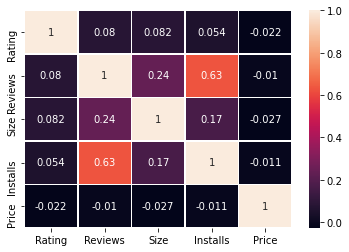

In [42]:
sns.heatmap(data.corr(),annot=True,linewidth=0.5)

positive relation of 0.62 between the reviews and installation.                    
hence downloading an app depends on number of reviews 

### Size impact on rating 

apps which as high rating has size between 15 MB and 40 MB

### Price impact on rating 

High rated apps have low prices 

###  paid apps / free apps which is more downloadable

apps which are paid,  is less downloadable

visualization done in Tableau 